il faudrait maintenant faire des statistiques descriptives avec les données sur lesquelles on travaille pour être très rigoureux

In [76]:
import pandas as pd
from _jointure_validations_stations import df_jointure_validations_stations
import matplotlib.pyplot as plt
from _pre_proces_stations import df_stations

In [34]:
!pip install plotly

In [35]:
import plotly.express as px

In [3]:
data=df_jointure_validations_stations()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [4]:
data.head()

,JOUR,lda,CATEGORIE_TITRE,NB_VALD,Mois,Année,Geo Point,Geo Shape,gares_id,nom_long,...,ind_40_54,ind_55_64,ind_65_79,ind_80p,ind_inc,pre_IDF,select,expt,,res_com
0,2023-01-01,59830,NON DEFINI,5,1,2023,"48.53289010230884, 2.290082513840396","{""coordinates"": [2.290082513840396, 48.5328901...",101,Bouray,...,138.0,87.0,83.0,46.0,1.0,1.0,1.0,1.0,NaN,RER C
1,2023-01-01,59830,AMETHYSTE,5,1,2023,"48.53289010230884, 2.290082513840396","{""coordinates"": [2.290082513840396, 48.5328901...",101,Bouray,...,138.0,87.0,83.0,46.0,1.0,1.0,1.0,1.0,NaN,RER C
2,2023-01-01,59830,FGT,5,1,2023,"48.53289010230884, 2.290082513840396","{""coordinates"": [2.290082513840396, 48.5328901...",101,Bouray,...,138.0,87.0,83.0,46.0,1.0,1.0,1.0,1.0,NaN,RER C
3,2023-01-01,59830,IMAGINE R,82,1,2023,"48.53289010230884, 2.290082513840396","{""coordinates"": [2.290082513840396, 48.5328901...",101,Bouray,...,138.0,87.0,83.0,46.0,1.0,1.0,1.0,1.0,NaN,RER C
4,2023-01-01,59830,NAVIGO,101,1,2023,"48.53289010230884, 2.290082513840396","{""coordinates"": [2.290082513840396, 48.5328901...",101,Bouray,...,138.0,87.0,83.0,46.0,1.0,1.0,1.0,1.0,NaN,RER C


In [5]:
data.columns

Index(['JOUR', 'lda', 'CATEGORIE_TITRE', 'NB_VALD', 'Mois', 'Année',
       'Geo Point', 'Geo Shape', 'gares_id', 'nom_long', 'nom_so_gar',
       'nom_su_gar', 'id_ref_ZdC', 'nom_ZdC', 'id_ref_ZdA', 'nom_ZdA',
       'idrefliga', 'idrefligc', 'indice_lig', 'mode_', 'tertrain', 'terrer',
       'termetro', 'tertram', 'terval', 'exploitant', 'idf', 'principal', 'x',
       'y', 'picto ligne', 'nom_iv', 'geometry', 'index_right', 'idcar_1km',
       'i_est_1km', 'lcog_geo', 'ind', 'men', 'men_pauv', 'men_1ind',
       'men_5ind', 'men_prop', 'men_fmp', 'ind_snv', 'men_surf', 'men_coll',
       'men_mais', 'log_av45', 'log_45_70', 'log_70_90', 'log_ap90', 'log_inc',
       'log_soc', 'ind_0_3', 'ind_4_5', 'ind_6_10', 'ind_11_17', 'ind_18_24',
       'ind_25_39', 'ind_40_54', 'ind_55_64', 'ind_65_79', 'ind_80p',
       'ind_inc', 'pre_IDF', 'select', 'expt', '', 'res_com'],
      dtype='object')

## Sur la fréquentation des stations de RER
Les données de validations sont obtenues à partir de tous les supports de télé-billetiques : cela signifie que les tickets en carton ne sont pas pris en compte, seuls les pass Navigo sont comptabilisés dans ces données. Voici quelques précisions sur les différentes catégories de titre : 
- **IMAGINE R** : regroupe les forfaits annuels Imagine R Scolaire et Imagine R Etudiant, forfaits réservés aux élèves, apprentis et étudiants qui permet de voyager à volonté toute l’année et dans toute l Ile-de-France.
- **NAVIGO** : regroupe les forfaits Navigo Annuel, Navigo Mois et Navigo Semaine.
- **AMETHYSTE** : comptabilise les forfaits Améthyste : forfait réservé aux personnes âgées ou handicapées sous conditions de ressources ou de statut, et résidant en Île-de-France. Ce forfait
annuel permet à son bénéficiaire de se déplacer de manière illimitée sur tous les modes de transport à l intérieur des zones de validité.
- **TST** : regroupe les forfaits hebdomadaires et mensuels à tarif réduit, accordé aux bénéficiaires
de la Réduction Solidarité Transport, pour voyager à l’intérieur des zones choisies sur tous les
modes de transport en Île-de-France.
- **FGT** : comptabilise les Forfaits Navigo Gratuité Transport, forfait qui permet à certain bénéficiaire d’aides sociales de voyager gratuitement dans toute l’Île-de-France.
- **AUTRE TITRE** : comptabilise les forfaits spéciaux.
- **NON DEFINI** : comptabilise les validations dont le type de titre n’est pas défini (anomalies).

Ensuite, il est important de noter qu'il s'agit de validations uniquement à l'entrée des stations. Il n'est donc pas question ici d'analyser les déplacements, de plutot de voir la fréquentation en "entrée" des stations. Pour restreindre notre analyse avec le temps que l'on a pour réaliser ce projet nous avons décider de nous restreindre uniquement aux stations de *RER*.

### Fréquentation
Dans un premier temps on s'interresse aux données de fréquentation brutes, sur tous les jours du premier semestre 2023 sur les stations de *RER*.

In [16]:
data.shape

(327424, 70)

In [13]:
data.loc[:,['NB_VALD']].describe()

,NB_VALD
count,327424.00000
mean,1004.92835
std,3786.49506
min,5.00000
25%,28.00000
50%,143.00000
75%,629.00000
max,128664.00000


Il y a, en moyenne, 1005 validations par jour dans les stations du *RER*, cependant cette moyenne cache de très gros écart. Il y a des stations qui sont extrèmement peu fréquentée : la documentation d'ÎDFM indique que lorsque le nombre de validations est inférieur à 5 mais strictement positif, la donnée est tronquée à 5 pour respecter les exigences de la CNIL.

#### Stations de RER très peu fréquentées

Une information statistique de ce tableau est également très interessante : le Q3 est inférieur à la moyenne : cela signifie que la fréquentation de certaines stations est si grande qu'elle "gonfle" la moyenne. Ces stations sont donc peu nombreuses au vue du nombre de stations totales du *RER* mais pourtant ce sont elles qui canalisent le plus de validation.

Pour identifier les stations avec les plus faibles validations on aggrégèe les données par jour (et donc on enlève les catégories). Il faut bien prendre en compte que le nombre de validations minimales gardé est de 5, et donc que, en aggrégeant par catégorie de pass Navigo on aura mécaniquement plus de validations (l'approximation sera gonflée). Si il n'y a aucune validation dans la journée pour un titre specifique la colonne est soit à 0 soit inexistante.

In [69]:
freq=data.loc[:,['JOUR', 'nom_long', 'CATEGORIE_TITRE', 'NB_VALD']]
freq_stations = freq.groupby(['JOUR', 'nom_long'])['NB_VALD'].sum().reset_index()
freq_stations

,JOUR,nom_long,NB_VALD
0,2023-01-01,Ablon,336
1,2023-01-01,Achères-Grand-Cormier,23
2,2023-01-01,Achères-Ville,872
3,2023-01-01,Antony,2237
4,2023-01-01,Arcueil-Cachan,1612
...,...,...,...
42041,2023-06-30,Épinay-sur-Seine,5184
42042,2023-06-30,Étampes,2583
42043,2023-06-30,Étréchy,612
42044,2023-06-30,Évry,713


In [102]:
faible_freq=freq_stations[freq_stations['NB_VALD'] <= 50]
faible_freq

,JOUR,nom_long,NB_VALD
1,2023-01-01,Achères-Grand-Cormier,23
16,2023-01-01,Boigneville,17
17,2023-01-01,Boissise-le-Roi,31
23,2023-01-01,Boutigny,23
29,2023-01-01,Buno-Gironville,15
...,...,...,...
41869,2023-06-30,Dourdan-la-Forêt,27
41946,2023-06-30,Musée d'Orsay,5
41993,2023-06-30,Saint-Fargeau,20
42010,2023-06-30,Sermaise,10


commenter

In [103]:
faible_freq_stations=faible_freq.loc[:,['nom_long']]
liste_faible_freq_stations= faible_freq_stations['nom_long'].value_counts()
liste_faible_freq_stations

nom_long
Vosves                          160
Boigneville                     160
Sermaise                        150
Le Plessis-Chenet               144
Buno-Gironville                 121
                               ... 
Nogent-le-Perreux                 1
Créteil Pompadour                 1
Aéroport Charles De Gaulle 1      1
Villepinte                        1
Javel                             1
Name: count, Length: 115, dtype: int64

commenter

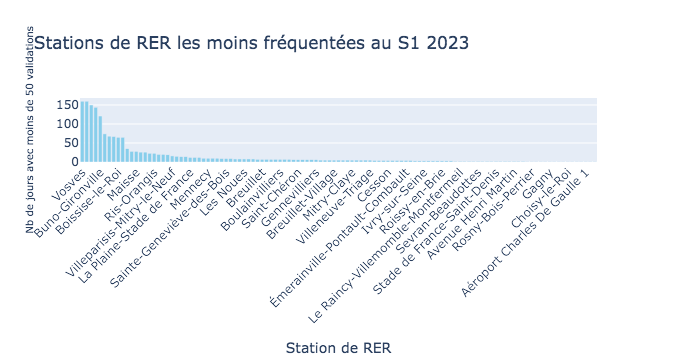

In [105]:
df=liste_faible_freq_stations.reset_index()
df.columns = ['Station de RER', 'Nb de jours avec moins de 50 validations']

# Créer un graphique en barres interactif
fig = px.bar(df, x='Station de RER', y='Nb de jours avec moins de 50 validations', title='Stations de RER les moins fréquentées au S1 2023')

# Personnaliser le graphique
fig.update_layout(xaxis_tickangle=-45)  # Incliner les étiquettes de l'axe des abscisses
fig.update_traces(marker_color='skyblue')  # Changer la couleur des barres si nécessaire
fig.update_yaxes(title_font=dict(size=10))

# Afficher le graphique
fig.show()

In [109]:
liste_faible_freq_stations=df.merge(stations, left_on="Station de RER", right_on="nom_long")

In [110]:
liste_faible_freq_stations

,Station de RER,Nb de jours avec moins de 50 validations,Geo Point,Geo Shape,gares_id,nom_long,nom_so_gar,nom_su_gar,id_ref_ZdC,nom_ZdC,...,ind_40_54,ind_55_64,ind_65_79,ind_80p,ind_inc,pre_IDF,select,expt,,res_com
0,Vosves,160,"48.5151514532052, 2.5993042659192627","{""coordinates"": [2.599304265919263, 48.5151514...",921,Vosves,NaN,NaN,61850,Vosves,...,59.0,28.0,30.2,8.1,0.0,1.0,1.0,1.0,NaN,RER D
1,Boigneville,160,"48.34166354368213, 2.37881544331189","{""coordinates"": [2.37881544331189, 48.34166354...",81,Boigneville,NaN,NaN,59420,Boigneville,...,8.9,12.9,9.0,4.1,0.0,1.0,1.0,1.0,NaN,RER D
2,Sermaise,150,"48.535806508307815, 2.069381524887471","{""coordinates"": [2.069381524887471, 48.5358065...",793,Sermaise,NaN,NaN,59842,Sermaise,...,2.7,1.9,3.3,0.4,0.0,1.0,1.0,1.0,NaN,RER C
3,Le Plessis-Chenet,144,"48.573807792623285, 2.479469169601777","{""coordinates"": [2.479469169601777, 48.5738077...",433,Le Plessis-Chenet,NaN,NaN,60006,Le Plessis Chenet,...,357.0,145.8,111.8,48.1,1.0,1.0,1.0,1.0,NaN,RER D
4,Buno-Gironville,121,"48.371383291366385, 2.3872097971981003","{""coordinates"": [2.3872097971981, 48.371383291...",117,Buno-Gironville,NaN,NaN,59447,Buno - Gironville,...,105.0,61.3,47.1,11.9,0.0,1.0,1.0,1.0,NaN,RER D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Nogent-le-Perreux,1,"48.839341938245695, 2.494188055346114","{""coordinates"": [2.494188055346114, 48.8393419...",593,Nogent-le-Perreux,NaN,NaN,71609,Nogent - Le Perreux,...,3226.0,1560.0,1407.0,621.0,17.5,1.0,1.0,1.0,NaN,RER E
111,Créteil Pompadour,1,"48.77126603718618, 2.435306339706322","{""coordinates"": [2.435306339706322, 48.7712660...",1159,Créteil Pompadour,NaN,NaN,69950,Créteil Pompadour,...,188.9,128.1,104.0,39.1,0.0,1.0,1.0,1.0,NaN,RER D
112,Aéroport Charles De Gaulle 1,1,"49.00975645120457, 2.5612326952251054","{""coordinates"": [2.561232695225105, 49.0097564...",743,Aéroport Charles De Gaulle 1,NaN,NaN,73596,Aéroport CDG 1 (Terminal 3),...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,667900.8037,RER B
113,Villepinte,1,"48.962709512366416, 2.5126446278196126","{""coordinates"": [2.512644627819613, 48.9627095...",905,Villepinte,NaN,NaN,73547,Villepinte,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,664313.9648,RER B


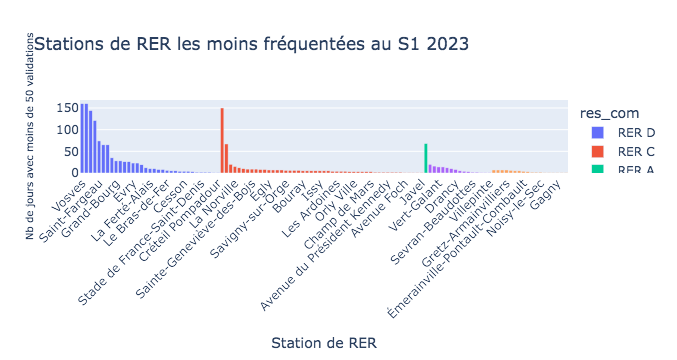

In [113]:
df2=liste_faible_freq_stations.reset_index()

fig = px.bar(df2, x='Station de RER', y='Nb de jours avec moins de 50 validations', color='res_com',
             title='Stations de RER les moins fréquentées au S1 2023')

# Personnaliser le graphique
fig.update_layout(xaxis_tickangle=-45)  # Incliner les étiquettes de l'axe des abscisses
#fig.update_traces(marker_color='skyblue')  # La couleur par défaut des barres, peut être écrasée par 'color'
fig.update_yaxes(title_font=dict(size=10))  # Réduire la taille de la police pour l'axe des ordonnées

# Afficher le graphique
fig.show()

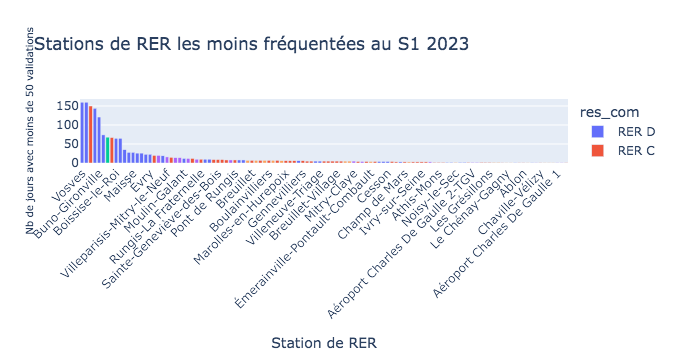

In [116]:
import plotly.express as px

# Trier le DataFrame par 'Nb de jours avec moins de 50 validations' en ordre décroissant
df_sorted = df2.sort_values(by='Nb de jours avec moins de 50 validations', ascending=False)

# Créer un graphique en barres interactif avec des couleurs conditionnelles
fig = px.bar(df_sorted, x='Station de RER', y='Nb de jours avec moins de 50 validations', color='res_com',
             title='Stations de RER les moins fréquentées au S1 2023',
             category_orders={"Station de RER": df_sorted['Station de RER'].tolist()})  # Définir l'ordre des catégories

# Personnaliser le graphique
fig.update_layout(xaxis_tickangle=-45)
fig.update_yaxes(title_font=dict(size=10))

# Afficher le graphique
fig.show()

## Sur les carreaux INSEE